<a href="https://colab.research.google.com/github/nayanemaia/Projects_MachineLearning/blob/main/Medium_RandomForestRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine learning: Tudo o que você precisa saber**

Vamos para a parte prática, porque nem só de teoria vive o homem, não é mesmo???

Para exemplificar o nosso estudo vamos usar um Dataset de notas de alunos de uma escola do Reino Unido, disponível no Kagle (https://www.kaggle.com/dipam7/student-grade-prediction).


![estudantes](https://media.giphy.com/media/26Ff5krXjZyOteqTC/giphy.gif)


#### Abaixo vamos ensinar como:

1.   Abrir o dataset e explorar esses dados, verificar anormalidades
2.   Transformar dados categóricos em númericos para fins de regressão
3.   Seleção de variáveis e como fazer isso
5.   Achar os melhores parâmetros e calibrar o modelo
6.   Evitar que ocorra Overfitting ou Underfitting
7.   Testar o modelo e avaliar


#### Quem que vos escreve né?
Aqui quem fala é a Nayane Maia, sou engenheira agrônoma e trabalho com Data Science desde 2018, quando fiz uma aulinha despretenciosa de Python sem nem saber mexer no Excel direito. Atualmente trabalho como cientista de dados na área da pesquisa em Agronomia e mudanças climáticas, mas sempre me arriscando em coisas aleatórias para aprender mais. E aqui estou ajudando o Matheus Cardoso a escrever o seu primeiro artigo de DS para a comunidade e para o Neuron-DS&AI.... Big responsibility! 

Vocês podem me achar no GitHub (https://github.com/nayanemaia) e LinkedIn (https://www.linkedin.com/in/nayane-maia/).



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Base de dados: https://www.kaggle.com/dipam7/student-grade-prediction



In [2]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Para iniciar, vamos fazer uma análise exploratória desses dados e verificar tendências. Primeiramente vamos abrir uma informação do dataset, percebemos que existem muitos dados categóricos (objects). Se a gente quisesse realizar uma classificação, seria uma belezinha, pois os nossos dados podem ser agrupados por classificação e clusterização. Mas como queremos fazer a estimação das notas, que são dados numéricos e inteiros (int64), precisamos transformar esses dados em codificação númerica, como veremos a seguir.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Ao realizar o describe dos nossos dados percebemos que não tem nenhum dado faltante, portanto, podemos seguir fazendo a análise exploratória dos dados.

In [4]:
# estatística descritiva 
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


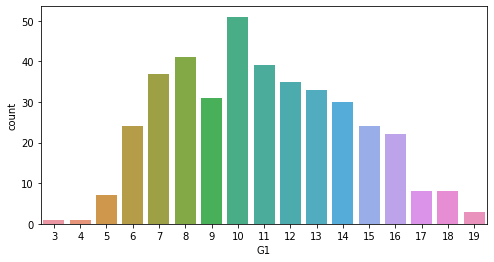

In [5]:
# distribuição das notas finais (G1) 
plt.figure(figsize=(8, 4))
sns.countplot(df['G1'])

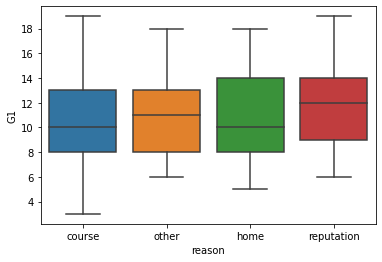

In [6]:
# reason to choose this school
sns.boxplot(x="reason", y='G1', data=df)

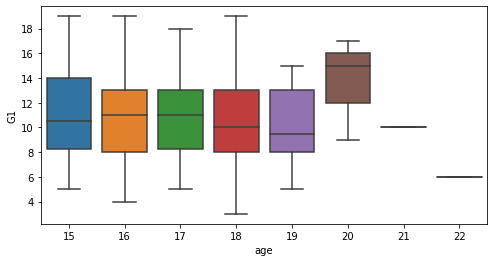

In [7]:
# Nota G1 x idade
plt.figure(figsize=(8, 4))
sns.boxplot(x="age", y='G1', data=df)

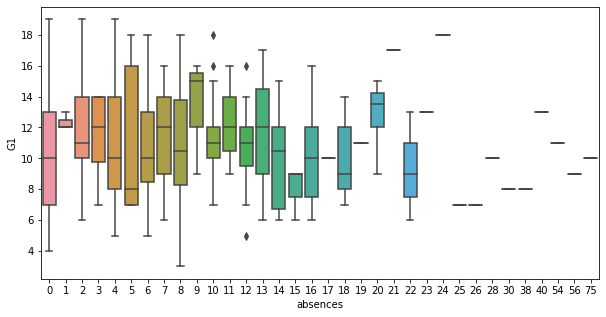

In [8]:
# Nota G1 x faltas
plt.figure(figsize=(10, 5))
sns.boxplot(x="absences", y='G1', data=df)

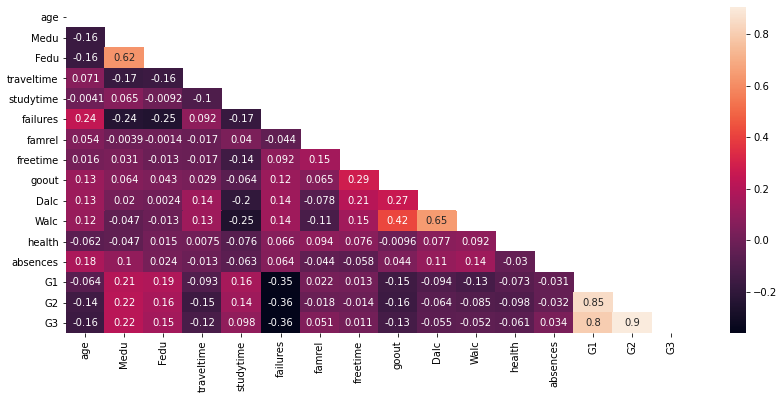

In [9]:
# Matriz de Correlação
corr = df.corr()

plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, annot=True, mask=mask)


Como falei anteriormente, precisamos codificiar os dados categoricos em numéricos. Existem diversas formas de fazer isso, que você pode encontrar aqui nesse artigo algumas formas (https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621). Nesse projeto vamos usar o LabelEncoder, como:


In [10]:
# Codificação dos atributos categóricos
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#seleciona os atributos categóricos
categoricas = df.select_dtypes(include='object').columns

# aplica o label encoder
df[categoricas] = df[categoricas].apply(lambda col: le.fit_transform(col))
df[categoricas].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


Vamos abrir o dataset completo atualizado e codificado:

In [11]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


Queremos estimar a nota dos alunos do grupo 1 (G1), para isso, precisamos definir quem vai ser as nossas variáveis dependentes e independentes, como abaixo:

In [ ]:
X = df.iloc[:,0:30] 
y = df['G1'] 

Como podemos ver, temos 30 features como variáveis independentes (X). Esse número grandes de variáveis pode deixar o treinamento do modelo muito lento, ou pode ter muitas variáveis com multicolinearidade, que afetam o desempenho do nosso modelo, além disso, pode deixar o nosso modelo com Underfitting (https://didatica.tech/underfitting-e-overfitting/). Para evitar isso, vamos usar um método para seleção de variáveis, para saber um pouco mais sobre alguns métodos, você pode encontrar aqui https://medium.com/neurondsai/comparando-m%C3%A9todos-de-sele%C3%A7%C3%A3o-de-vari%C3%A1veis-ef6ffe4f501. No nosso caso, vamos usar um método super simples, que é o método MDI (Mean Decrease Impurity) usando o Random Forest.

### Usando o método de seleção de variáveis pelo método de RandomForestClassifier

In [ ]:
def mean_decrease_impurity(model, feature_names):

    # Feature importance based on in-sample (IS) mean impurity reduction
    feature_imp_df = {i: tree.feature_importances_ for i, tree in enumerate(model.estimators_)}
    feature_imp_df = pd.DataFrame.from_dict(feature_imp_df, orient='index')
    feature_imp_df.columns = feature_names

    # Make sure that features with zero importance are not averaged, since the only reason for a 0 is that the feature
    # was not randomly chosen. Replace those values with np.nan
    feature_imp_df = feature_imp_df.replace(0, np.nan)  # Because max_features = 1

    importance = pd.concat({'mean': feature_imp_df.mean(),
                            'std': feature_imp_df.std() * feature_imp_df.shape[0] ** -0.5}, axis=1)

    importance /= importance['mean'].sum()
    return importance


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 6)

def plot_feature_importance(importance_df, oob_score, oos_score):

    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    plt.title('Feature importance. OOB Score:{}; OOS score:{}'.format(round(oob_score, 4), round(oos_score, 4)))
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
#setup accuracy as score metric
scorer = make_scorer(accuracy_score)
#fit classifier
clf = RandomForestClassifier(max_features=1, oob_score=True)
fit = clf.fit(X, y)
#get importances dataframe
mdi_importances = mean_decrease_impurity(fit, X.columns)

#get oob & oos scores
oob_score = fit.oob_score_
oos_score = cross_val_score(clf, X, y, cv=3, scoring=scorer).mean()

C:\Users\nayan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


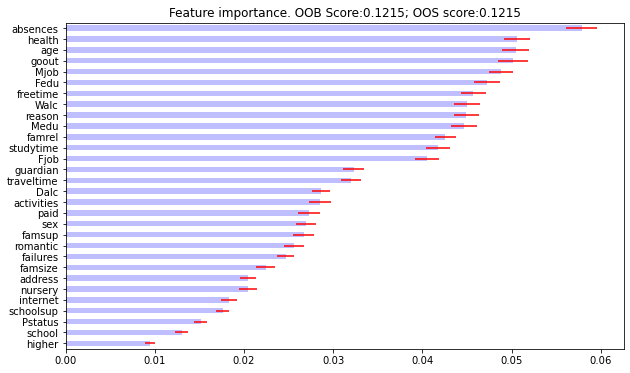

In [ ]:
plot_feature_importance(mdi_importances, oob_score=oob_score, oos_score=oos_score)

Para escolher as melhores variáveis não nos baseamos apenas pelas saídas geradas pelo RF, pois analisando o gráfico de correlação, percebemos que as variáveis selecionadas tinha uma baixa correlação, então mesclamos com as variáveis que melhor poderiam explicar o resultado final. Pois o principal objetivo do Machine Learning é exatamente esse, usar soluções que sejam palpáveis e explicavéis. Pensando sempre do ponto de vista do negócio. Qual solução eu quero trazer e de qual forma posso ajudar o meu cliente?

# Testando o modelo de Machine Learning

Importante lembrar que o número de variáveis selecionadas depende muito do ponto de vista do negócio também, do que adianta eu selecionar 10 variáveis , mas que não fazem sentido nenhum para o negócio ou responder as minhas dúvidas. No entanto, o contrário também existe, pode ser que apenas 4 ou 5 variáveis não seja o suficiente para explicar a sua solução. Então nessa fase, pesa muito as noções de negócio e seu entendimento de mundo como cientista de dados da área a qual você é especialista.

In [ ]:
# inserindo apenas as variáveis que achamos importantes
X = X [['Medu','absences','Fedu','failures']]
y = y

Para o modelo não identificar e decorar tendências  nos dados, vamos dividir o dataset em treinamento e teste. Em que 70% dos dados vão para treinamentos e 30% dos dados para teste, como:

In [ ]:
# separando treinamento  e teste
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape); print(X_test.shape)

(276, 4)
(119, 4)


## Testando o algoritmo Random Forest Regressor





Chegou a hora de treinar o seu modelo de Machine Learning e não deixar a peruca cair!

![super modelo](https://media.giphy.com/media/6oR9lrRFIGFu8/giphy.gif)






> Para calibrar o nosso modelo vamos usar o GridSearch, dessa forma não perdemos tempo inserindo diversas features até achar um resultado razoável. Automaticamente ele ja seleciona os melhores parâmetros usando o crossvalidation (CV), deixando nosso modelo mais robusto, sem risco dele decorar o dataset e causar um Overfitting. Para saber mais sobre o CV veja aqui (https://medium.com/data-hackers/crossvalidation-de-maneira-did%C3%A1tica-79c9b080a6ec).

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model_params = {
    'max_depth' : [2,3,4,5,6,10],
    'n_estimators': [10,30,50,100,150]}

# create random forest model
rf_model = RandomForestRegressor(random_state=1)
clf = GridSearchCV(rf_model, model_params, cv=5)
model = clf.fit(X_train, y_train)

print('Train R^2 Treinamento: %.3f'%clf.best_estimator_.score(X_train, y_train))
print('Test R^2 Teste: %.3f'%clf.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',model.best_params_)

Train R^2 Treinamento: 0.171
Test R^2 Teste: 0.129
Best Parameters :  {'max_depth': 2, 'n_estimators': 150}


Após o GridSearch fazer a seleção das melhores variáveis dividindo o treinamento em 5 partes (CV=5), tudo isso para ele não decorar os dados. Você deve ta se perguntando, mas para quê eu separei 70% dos meus dados para treinamento e agora preciso fazer isso de novo?! Como falei antes, mesmo você dividindo o dataset, o algoritmo pode aprender muito bem nessa fase de treinamento (em outras palavras, ele vai decorar os seus dados!) e ter um péssimo desempenho no teste final. Fazendo isso, os riscos são menores dele gravar as tendências.

Agora que ja temos os nossos *Best Parameters*, vamos agora inserir os melhores resultados no nosso modelo de regressão e avaliar o desempenho dele:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=150,max_depth= 2, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Avaliação do desempenho do modelo
print('R2 do teste:', r2_score(y_test, y_pred))
print('RMSE:' , sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE=",np.mean(np.abs((y_test - y_pred) / y_test))* 100 )

R2 do teste: 0.12886892106254388
RMSE: 2.8862010220132177
MAPE= 24.45507070397361


Logo abaixo podemos ver a porcentagem de erro para cada repetição dos dados (Target), podemos ver que teve nota de um aluno que teve uma diferença de 41%:

In [ ]:
# - Test prediction
performance = pd.DataFrame(y_pred, columns=['Prediction'])
# - Target data
y_test = y_test.reset_index(drop=True)
performance['Target'] = y_test
# - The difference in %
performance['Difference (%)']= np.absolute((performance['Target'] 
                                            - performance['Prediction'])/
                                           performance['Target']*100)
performance.head()

,Prediction,Target,Difference (%)
0,7.722721,6,28.712015
1,10.970913,10,9.709135
2,8.483207,6,41.386780
3,11.370316,9,26.336849
4,11.135365,11,1.230591


Vamos avaliar as variáveis que foram escolhidas para estimar as notas dos alunos do G1:

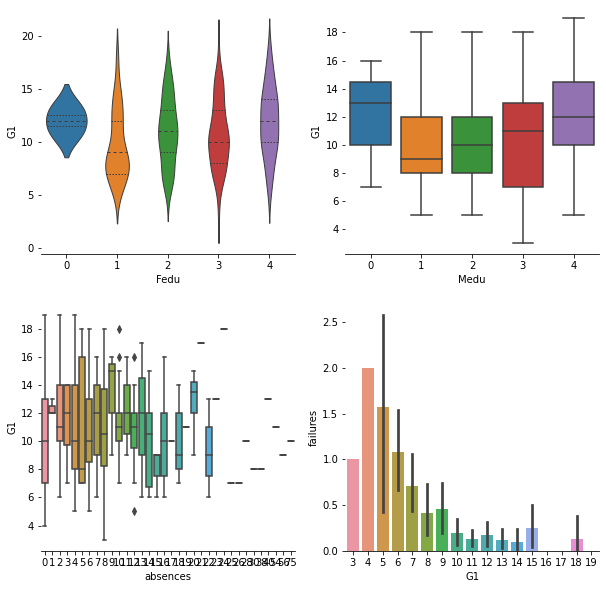

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#definindo o tamanho das figuras
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(221)
sns.violinplot(data=df, x="Fedu", y="G1",
               split=True, inner="quart", linewidth=1,)
sns.despine(left=True)
fig.add_subplot(222)
sns.boxplot(x="Medu", y='G1', data=df)
sns.despine(left=True)
fig.add_subplot(223)
sns.boxplot(x='absences', y='G1', data=df)
sns.despine(left=True)
fig.add_subplot(224)
p2 = sns.barplot(x = 'G1', y = 'failures', data = df)
sns.despine(left=True)


Podemos perceber que a precisão do modelo realmente foi ruim, pois os dados estimados (vermelho) das notas dos alunos passaram bem longe dos dados reais (azul):

C:\Users\nayan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\nayan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


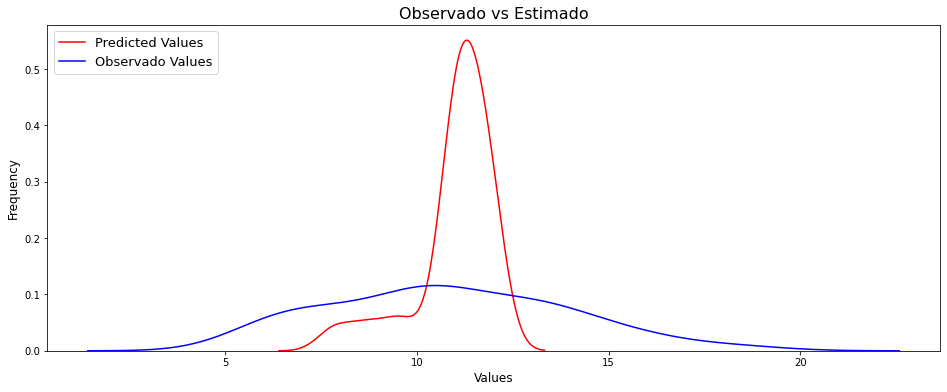

In [ ]:
import seaborn as sns
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Observado Values')
plt.title('Observado vs Estimado', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)



---




# Questionamentos



## ![question](https://media.giphy.com/media/3o7btZ1Gm7ZL25pLMs/giphy.gif)





O que poderia ser feito nesse modelo para aumentar a precisão?? 

Talvez inserir outras features?


Outro método de seleção de variáveis? 


Transformar e padronizar os dados de entrada?

Fazer teste de multicolinearidade e eliminar variáveis tendenciosas?

Fica aí esses questionamentos para vocês resolverem! #peace


No kagle (https://www.kaggle.com/dipam7/student-grade-prediction/code), percebi que a maior precisão encontrada para esse Dataset usando o Random Forest foi de R2=0.86. No entanto, quando fui analisar as features de entrada que eles usaram, uma das melhores variáveis selecionadas foram as notas dos grupos 2 e 3 (G2, G3). Decidimos não inserir essas features como variáveis independentes porque achamos que seria muito tendencioso, ja que foram as variáveis com a maior correlação de pearson. 

Vamos imaginar que você seja contratado como cientista de dados para estimar as notas dos alunos de uma escola, e se acontecer de uma escola não ter outras turmas para estimar as notas? E se todas as variáveis disponíveis forem ausência, sexo, saúde, razões, etc?? Para evitar que nosso modelo fosse tendencioso por causa das notas das outras turmas, colocamos todas as variáveis, exceto as notas dos outros grupos, talvez por isso a precisão foi tão baixa do nosso modelo. 

Mas temos que lembrar que nem sempre podemos olhar apenas a precisão do modelo, e lembrar que o nosso erro de notas foi baixo, variando de 2.8 para mais ou para menos (RMSE), o que representa um erro médio de aproximadamente 24% (MAPE). Portanto, o ideal aqui seria testar outros modelos para ver se a acurácia e a precisão vão melhorar.


![bye](https://media.giphy.com/media/TcjqWaTRG9q0w/giphy.gif)